## NN in keras for custom dataset - example-3

In [2]:
import os

import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K

from sklearn.utils import shuffle

## Define path and necessary parameters

In [4]:
PATH = os.getcwd()
# Define data path
train_data_path = os.path.join(PATH ,'data_4_class','train')
test_data_path = os.path.join(PATH ,'data_4_class','test')
# Read out the folders or data classes
train_data_dir_list = os.listdir(train_data_path)
test_data_dir_list = os.listdir(test_data_path)
print ('data_list: ', test_data_dir_list)
num_classes=2
# Assign Labels to the datset
labels={'cats':0,'dogs':1, 'horses':2, 'humans':3}
num_rows=32
num_cols=32

num_epoch=100
batch_size=32

data_list:  ['cats', 'dogs', 'horses', 'humans']


## Load the train files and assign labels to each file

In [ ]:
# the list to store the name and label of files
train_data_files = []
train_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in train_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(train_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        train_data_files.append(f_name)
        train_data_labels.append(label)

num_train_samples = len(train_data_files)
print ('num of train samples:',num_train_samples)

#Shuffle the dataset
train_data_files,train_data_labels = shuffle(train_data_files,train_data_labels, random_state=2)

In [9]:
print (train_data_files[0:10])


['cats\\cat.94.jpg', 'cats\\cat.38.jpg', 'horses\\horse-31.jpg', 'dogs\\dog.60.jpg', 'humans\\rider-6.jpg', 'cats\\cat.31.jpg', 'cats\\cat.7.jpg', 'dogs\\dog.9.jpg', 'humans\\rider-12.jpg', 'horses\\horse-32.jpg']


## Load the test files and assign labels to each file

In [10]:
# the list to store the name and label of files
test_data_files = []
test_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in test_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(test_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        test_data_files.append(f_name)
        test_data_labels.append(label)

num_test_samples = len(test_data_files)
print ('num of test samples:',num_test_samples)

#Shuffle the dataset
test_data_files,test_data_labels = shuffle(test_data_files,test_data_labels, random_state=2)

Loading the files of dataset-cats

Loading the files of dataset-dogs

Loading the files of dataset-horses

Loading the files of dataset-humans

num of test samples: 80


## Define a function to read the loaded file names

In [11]:
## Define a function to read the loaded file names​​# define the function to read the test data
def read_data(data_category='train'):
    x=[]
    y=[]
    if data_category == 'train':
        data_path = train_data_path
        data_files = train_data_files
        data_labels = train_data_labels
        
    elif data_category == 'test':
        data_path = test_data_path
        data_files = test_data_files
        data_labels = test_data_labels
        
    for file_name,lab in zip(data_files,data_labels):
        #print ('file_read: ', data_path+'\\'+fil)
        img_name = os.path.join(data_path,file_name)
        img = cv2.imread(img_name)
        img=cv2.resize(img,(num_rows,num_cols))
        #cv2.imshow('img',img)
        #cv2.waitKey(1)
        x.append(img)
        y.append(lab)
    return x,y

In [17]:
#read the train data
X_train,y_train = read_data(data_category='train')
X_train,y_train=np.array(X_train),np.array(y_train)
m_train = X_train.shape[0]
img_size = X_train[0].shape
print ("Number of training examples: m_train = " + str(m_train))
print ("Each image is of size:", img_size)
print ("X_train shape: " + str(X_train.shape))
print ("Label shape: " + str(y_train.shape))

Number of training examples: m_train = 400
Each image is of size: (32, 32, 3)
X_train shape: (400, 32, 32, 3)
Label shape: (400,)


## Read the test data from loaded file name

In [18]:
#read the test data
X_test,y_test = read_data(data_category='test')
X_test,y_test = np.array(X_test),np.array(y_test)
m_test = X_test.shape[0]
img_size = X_test[0].shape
print ("Number of test examples: m_test = " + str(m_test))
print ("Each image is of size:", img_size)
print ("test_set_x shape: " + str(X_test.shape))
print ("Label shape: " + str(y_test.shape))

Number of test examples: m_test = 80
Each image is of size: (32, 32, 3)
test_set_x shape: (80, 32, 32, 3)
Label shape: (80,)


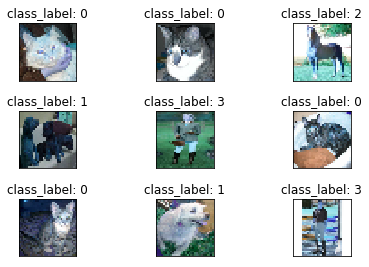

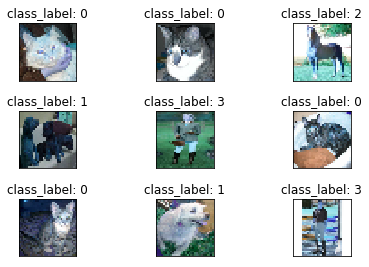

In [19]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("class_label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [22]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(m_train, num_rows*num_cols*3)
X_test = X_test.reshape(m_test, num_rows*num_cols*3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (400, 32, 32, 3)
y_train shape (400,)
X_test shape (80, 32, 32, 3)
y_test shape (80,)
Train matrix shape (400, 3072)
Test matrix shape (80, 3072)


In [23]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3]), array([100, 100, 100, 100], dtype=int64))


In [24]:
# one-hot encoding using keras' numpy-related utilities
num_classes = 4
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (400,)
Shape after one-hot encoding:  (400, 4)


In [31]:
num_epoch=100
batch_size=128

In [32]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(3072,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
# compiling the sequential model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [33]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)

Train on 400 samples, validate on 80 samples
Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 3.3267 - acc: 0.2725 - val_loss: 1.8989 - val_acc: 0.2500
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 1.7525 - acc: 0.2825 - val_loss: 1.4635 - val_acc: 0.4125
Epoch 3/100
400/400 [==============================] - 0s 1ms/step - loss: 1.5221 - acc: 0.3075 - val_loss: 1.4281 - val_acc: 0.2625
Epoch 4/100
400/400 [==============================] - 0s 1ms/step - loss: 1.3936 - acc: 0.3525 - val_loss: 1.3684 - val_acc: 0.3375
Epoch 5/100
400/400 [==============================] - 0s 1ms/step - loss: 1.4261 - acc: 0.3550 - val_loss: 1.2737 - val_acc: 0.4375
Epoch 6/100
400/400 [==============================] - 0s 919us/step - loss: 1.3604 - acc: 0.3375 - val_loss: 1.2426 - val_acc: 0.4000
Epoch 7/100
400/400 [==============================] - 0s 962us/step - loss: 1.3285 - acc: 0.3650 - val_loss: 1.2206 - val_acc: 0.4250
Epoch 8/100
400/400 

400/400 [==============================] - 0s 731us/step - loss: 0.5722 - acc: 0.7675 - val_loss: 0.4626 - val_acc: 0.7625
Epoch 62/100
400/400 [==============================] - 0s 763us/step - loss: 0.5813 - acc: 0.7575 - val_loss: 0.4261 - val_acc: 0.8125
Epoch 63/100
400/400 [==============================] - 0s 856us/step - loss: 0.5116 - acc: 0.8075 - val_loss: 0.4337 - val_acc: 0.8375
Epoch 64/100
400/400 [==============================] - 0s 781us/step - loss: 0.5275 - acc: 0.7950 - val_loss: 0.3795 - val_acc: 0.8500
Epoch 65/100
400/400 [==============================] - 0s 900us/step - loss: 0.4946 - acc: 0.8125 - val_loss: 0.2879 - val_acc: 0.9125
Epoch 66/100
400/400 [==============================] - 0s 875us/step - loss: 0.4410 - acc: 0.8525 - val_loss: 0.4737 - val_acc: 0.7875
Epoch 67/100
400/400 [==============================] - 0s 706us/step - loss: 0.5717 - acc: 0.7775 - val_loss: 0.5586 - val_acc: 0.7625
Epoch 68/100
400/400 [==============================] - 0s 72

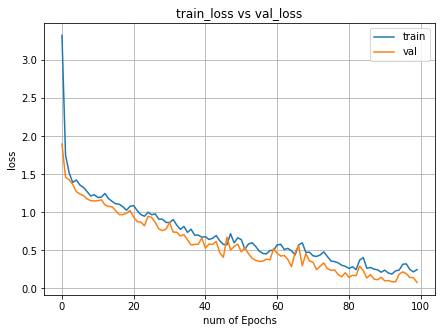

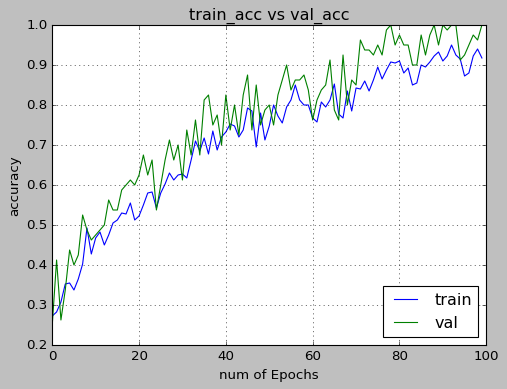

In [34]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_nn_ex-3')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_nn_ex-3')

In [35]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

80/80 [==============================] - 0s 844us/step
[0.07955527454614639, 1.0]
loss: 0.07955527454614639
acc:  100.0%


In [36]:
# Predict output probability
model.predict(X_test[10:11])

array([[8.4671372e-01, 1.0764171e-02, 3.9753554e-04, 1.4212467e-01]],
      dtype=float32)

In [37]:
Y_test[10:11]

array([[1., 0., 0., 0.]], dtype=float32)

In [38]:
model.predict_classes(X_test[10:15])

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
from keras.models import load_model

In [40]:
model.save('nn_model_ex-3.h5')

In [41]:
loaded_model=load_model('nn_model_ex-2.h5')